## Simple Regression technniques in Python

Worked from here
https://www.youtube.com/watch?v=EMIyRmrPWJQ&t=18s

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt


### Get data for SPY and GOOG

The aim of this is to be able to fit a line and then display that fitted line

In [3]:

stocks = "GOOG SPY".split()
start = dt.date.today() - dt.timedelta(365)

data = pdr.get_data_yahoo(stocks, start)["Close"]
data.head()

Symbols,GOOG,SPY
Date,,
2021-09-20,139.016998,434.040009
2021-09-21,139.646500,433.630005
2021-09-22,140.938507,437.859985
2021-09-23,141.826508,443.179993
2021-09-24,142.632996,443.910004


In [4]:
returns = (np.log(data).diff()).dropna()
returns.head()

Symbols,GOOG,SPY
Date,,
2021-09-21,0.004518,-0.000945
2021-09-22,0.009209,0.009708
2021-09-23,0.006281,0.012077
2021-09-24,0.005670,0.001646
2021-09-27,-0.007968,-0.002865


Here we are looking at the correlation between SPY and Google, it shows a high correlation (83%)

In [5]:
# show correlation
returns.corr()

Symbols,GOOG,SPY
Symbols,,
GOOG,1.000000,0.831988
SPY,0.831988,1.000000


We will grab a random sample of the data and then look at the correlation of that 

In [6]:
sample = returns.sample(60).corr()
sample


Symbols,GOOG,SPY
Symbols,,
GOOG,1.000000,0.846563
SPY,0.846563,1.000000


### Next we will plot

* x (the independent variable) is SPY
* y (the dependent variable, is Google)



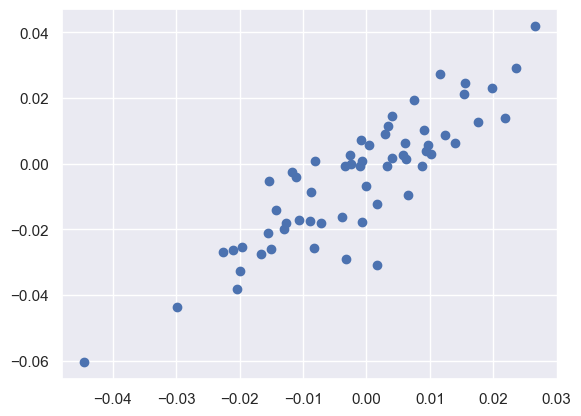

In [7]:
sample = returns.sample(60)

plt.scatter(x=sample['SPY'], y=sample['GOOG']);


### Next thing to do is to fit our linear model

Here we use numpy polyfit
This will work for 1 variable regression
Poly indicates that we can use polynomials

We are going to fit the sample data, to predict google

For a simple regression we set the degree as 1

In [9]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg=1)
reg

array([ 1.23988495, -0.0028777 ])

This output shows us the slope and the y-intercept of our regression

Here we can see that for every 1% that SPY goes up we can expect google to go up 1.24 % 

__This is equivalent to what we predict beta is__

Now we have that we can plot our best fit line against the scatter plot.

So we will create a trendline, which will make an array with the predicted values


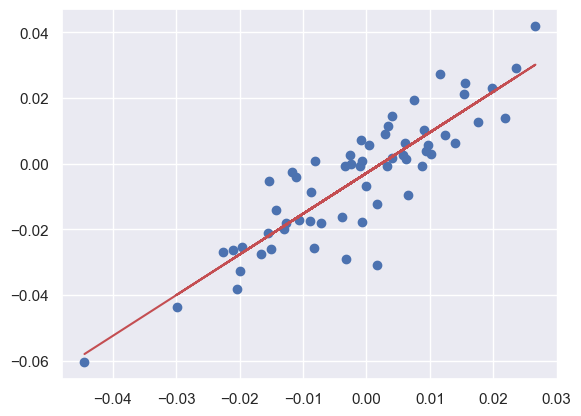

In [10]:

trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample['SPY'], sample['GOOG'])
plt.plot(sample['SPY'], trend, 'r')

### Regression as a technical inidicator



In [20]:
# this will give us a series so we will make sure we 
# organise it as a dataframe
data = pd.DataFrame(pdr.get_data_yahoo('SPY', start)['Close'])
data

# Now we have our data we are going to regress it against the data
# so we will add a colummn, that serialises time
time = np.arange(1, len(data) + 1)
data['time'] = time
# we will then rearramge our columns
data = data[['time', 'Close']]
# round out the data to remove some uneeded precision
data = round(data, 2)
data.tail()



,time,Close
Date,,
2022-09-12,247,410.97
2022-09-13,248,393.10
2022-09-14,249,394.60
2022-09-15,250,390.12
2022-09-16,251,385.56


In [23]:
reg = np.polyfit(data['time'], data['Close'], deg = 1)
reg

array([-3.04560895e-01,  4.68738498e+02])

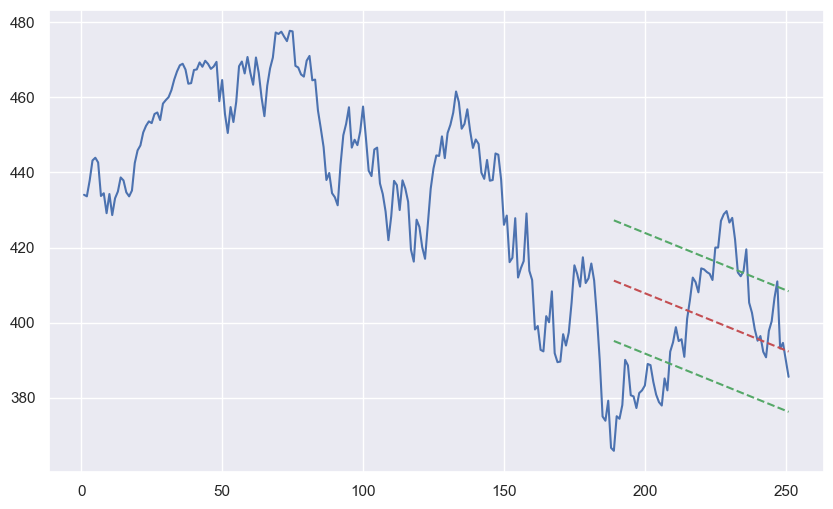

In [29]:
trend = np.polyval(reg, data['time'][-63:])

std = data['Close'][-63:].std()

plt.figure(figsize=(10,6))

# then plot
plt.plot(data['time'], data['Close'], label ='S&P500')
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--')




In [ ]:
trend = 